Configure path envirorment

In [1]:
import sys
import os
sys.path.append(os.getcwd()[:-4])

Import Libraries

In [2]:
import numpy as np
from examples.binary_knapsack import BinaryKnapSack
from src.crossover.one_point_crossover import OnePointCrossover
from src.mutation.position_mutation import PositionMutation
from src.selection.tournament_selection import TournamentSelection

import matplotlib.pyplot as plt
plt.style.use('ggplot')

Defining Items Weights and Profits 

Items | Weights | Profits 
------- | -------- | -------- 
A | 3 | 4  
B | 5 | 8 
C | 4 | 6 
D | 2 | 3

In [3]:
n_items = 4
capacity = 10
weights = np.array([3,5,4,2])
profits = np.array([4,8,6,3])

Creating the genetic algorithm model

In [4]:
model = BinaryKnapSack(
    n_individuals = 100,
    n_genes = n_items,
    otimizer = np.argmax,  # Minimize the function
    weights = weights,
    profits = profits,
    capacity = capacity
)

model.set_selection(TournamentSelection())
model.set_crossover(OnePointCrossover())
model.set_mutation(PositionMutation())


Running the Optimization

In [5]:
best_individual = model.simulate()
print('Individual:', best_individual)
print('Best result:', model.fitness([best_individual])[0])

Individual: [1 1 0 1]
Best result: 15.0


Visualizing the Fitness Evolution

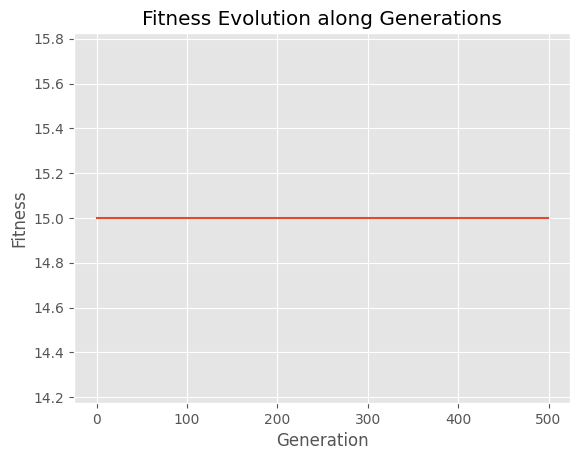

In [7]:
fitness_evolution = [max(model.fitness(generation)) for generation in model.history_individuals]
plt.plot(fitness_evolution)
plt.title('Fitness Evolution along Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()